In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from zipfile import ZipFile
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as pp
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
py.sign_in('Adwoa_B','A2iWt8xtUFDyY7NYCyRI')

In [4]:
plotly.offline.init_notebook_mode()

In [5]:
pd.set_option('precision', 3)

In [6]:
# Extracting data from zipped file

zip = ZipFile('120-years-of-olympic-history-athletes-and-results.zip')
zip.extractall()

In [7]:
# Loading data to .csv format

athlete_events = pd.read_csv('athlete_events.csv')

In [8]:
athlete_events.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

 # DATA CLEANING

In [9]:
# Rename 'NaN' in Medal column to 'No Medal'

athlete_events['Medal'].fillna('No Medal', inplace=True)
athlete_events.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event     Medal  
0       Basketball Men's Basketball  No Medal  
1      Judo Men's Extra-Lightweight  No Medal  
2           Football Men's Football  No Medal  
3       Tug-Of-War Men's Tug-Of-War      Gold  
4  Speed Skating Women's 500 metres  No Medal

In [10]:
# Rename 'NaN' in Height and Weight columns to '0'

athlete_events['Height'].fillna('0', inplace=True)

athlete_events['Weight'].fillna('0', inplace=True)

athlete_events.head()

ID                      Name Sex   Age Height Weight            Team  NOC  \
0   1                 A Dijiang   M  24.0    180     80           China  CHN   
1   2                  A Lamusi   M  23.0    170     60           China  CHN   
2   3       Gunnar Nielsen Aaby   M  24.0      0      0         Denmark  DEN   
3   4      Edgar Lindenau Aabye   M  34.0      0      0  Denmark/Sweden  DEN   
4   5  Christine Jacoba Aaftink   F  21.0    185     82     Netherlands  NED   

         Games  Year  Season       City          Sport  \
0  1992 Summer  1992  Summer  Barcelona     Basketball   
1  2012 Summer  2012  Summer     London           Judo   
2  1920 Summer  1920  Summer  Antwerpen       Football   
3  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event     Medal  
0       Basketball Men's Basketball  No Medal  
1      Judo Men's Extra-Lightweight  No Medal  
2           Football Men's Football  No Medal  
3       Tug-Of-War Men's Tug-Of-War      Gold  
4  Speed Skating Women's 500 metres  No Medal

In [11]:
# Selecting data from 1995 - 2016

years = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005, 2006,  2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
df2 = athlete_events[athlete_events.Year.isin(years)]
df2.reset_index(inplace=True)

In [12]:
df2.head()

index  ID                Name Sex   Age Height Weight     Team  NOC  \
0      1   2            A Lamusi   M  23.0    170     60    China  CHN   
1     28   9    Antti Sami Aalto   M  26.0    186     96  Finland  FIN   
2     31  12   Jyri Tapani Aalto   M  31.0    172     70  Finland  FIN   
3     32  13  Minna Maarit Aalto   F  30.0    159   55.5  Finland  FIN   
4     33  13  Minna Maarit Aalto   F  34.0    159   55.5  Finland  FIN   

         Games  Year  Season            City       Sport  \
0  2012 Summer  2012  Summer          London        Judo   
1  2002 Winter  2002  Winter  Salt Lake City  Ice Hockey   
2  2000 Summer  2000  Summer          Sydney   Badminton   
3  1996 Summer  1996  Summer         Atlanta     Sailing   
4  2000 Summer  2000  Summer          Sydney     Sailing   

                          Event     Medal  
0  Judo Men's Extra-Lightweight  No Medal  
1   Ice Hockey Men's Ice Hockey  No Medal  
2       Badminton Men's Singles  No Medal  
3    Sailing Women's Windsurfer  No Medal  
4    Sailing Women's Windsurfer  No Medal

In [13]:
df2.shape

(102643, 16)

In [14]:
athlete_events.shape

(271116, 15)

# DATA VISUALIZATION

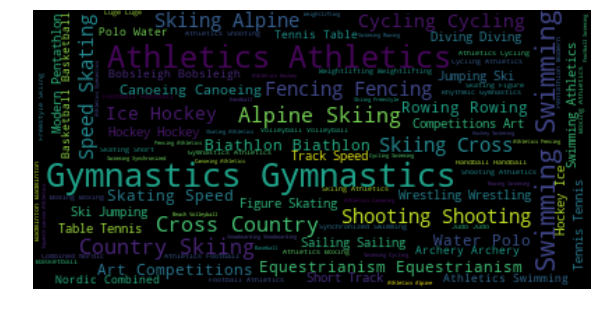

In [15]:
df = pd.read_csv('athlete_events.csv')['Sport']
cloud = ",".join(df)

#print(cloud)

wordcloud = WordCloud(max_font_size=25, max_words=len(cloud), background_color='black').generate(cloud)

plt.figure(figsize=(10,12))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

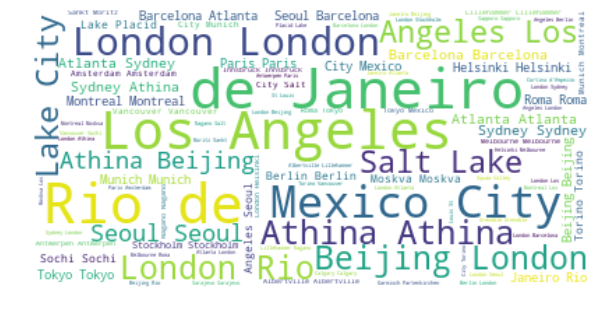

In [16]:
city_df = pd.read_csv('athlete_events.csv')['City']
cloud1 = ",".join(city_df)


wordcloud = WordCloud(max_font_size=40, max_words=len(cloud1), background_color='white').generate(cloud1)

plt.figure(figsize=(10,12))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [17]:
graph1 = athlete_events['Sport'].value_counts()

figure = go.Bar(
    x=graph1.index,
    y=graph1.values,
    marker=dict(
        color=graph1.values,
        colorscale = 'Jet',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Sports Participation From 1896'
)

data = [figure]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename="Sports Participation From 1896")

In [18]:
graph2 = df2['Sport'].value_counts()

figure = go.Bar(
    x=graph2.index,
    y=graph2.values,
    marker=dict(
        color=graph1.values,
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Sports Participation From 1995'
)

data = [figure]
fig1 = go.Figure(data=data, layout=layout)
iplot(fig1, filename="Sports Participation From 1995")

## SEASONAL (SUMMER & WINTER) PARTICIPATION

In [19]:
summer_events = athlete_events[athlete_events['Season'] == 'Summer']
winter_events = athlete_events[athlete_events['Season'] == 'Winter']

In [20]:
year_summer = summer_events.groupby('Year', as_index = False).count()
year_winter = winter_events.groupby('Year', as_index = False).count()


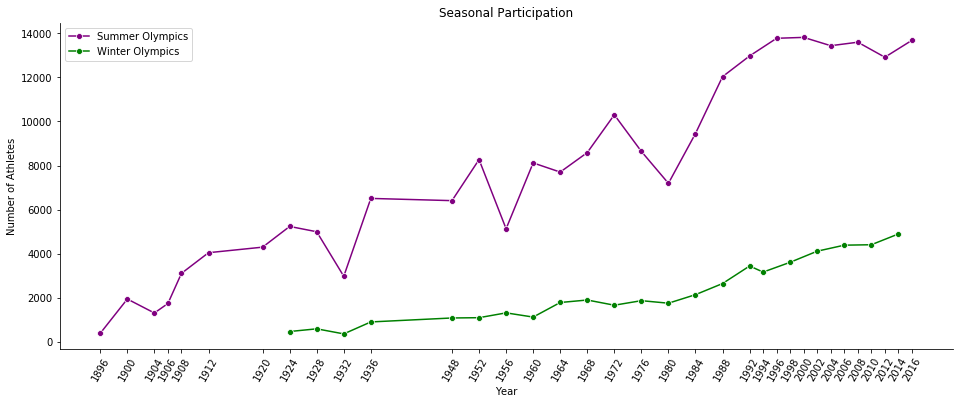

In [21]:
fig = plt.figure(figsize = (16, 6))

sns.lineplot(x = 'Year', y = 'Name', data =year_summer, label = 'Summer Olympics', color = 'purple', marker = 'o')
sns.lineplot(x = 'Year', y = 'Name', data = year_winter, label = 'Winter Olympics', color = 'green', marker = 'o')
plt.xlabel('Year')
plt.xticks(athlete_events['Year'].unique(), rotation = 60)

plt.ylabel('Number of Athletes')
plt.title("Seasonal Participation",color="black")
plt.grid(True,alpha=.2)

# Clean chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().grid(False)

plt.show()

## Sports Engagement During Summer

In [22]:
summer_events = athlete_events[athlete_events['Season'] == 'Summer']
winter_events = athlete_events[athlete_events['Season'] == 'Winter']

In [23]:
sport_summer = summer_events.groupby('Sport', as_index = False).count()
sport_winter = winter_events.groupby('Sport', as_index = False).count()

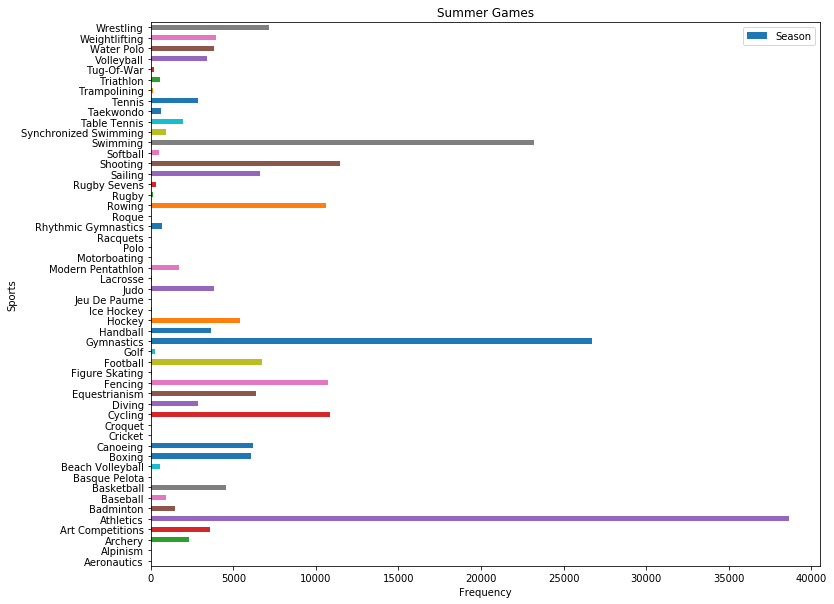

In [35]:
sport_summer.plot.barh(x='Sport', y='Season')
plt.title('Summer Games')
plt.xlabel('Frequency')
plt.ylabel('Sports')
plt.rcParams['figure.figsize'] = (12,10)

plt.show()

## Sports Engagement During Winter

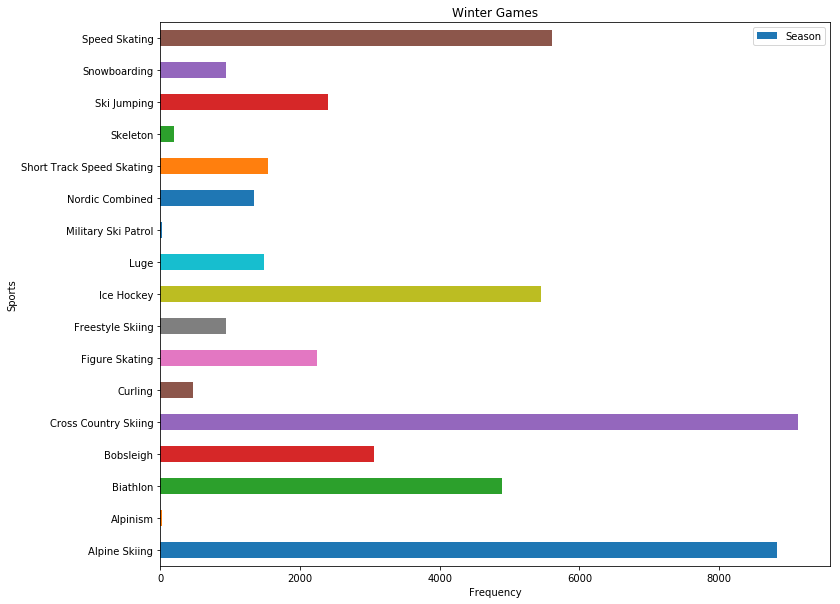

In [25]:
sport_winter.plot.barh(x='Sport', y='Season')
plt.title('Winter Games')
plt.xlabel('Frequency')
plt.ylabel('Sports')
plt.rcParams['figure.figsize'] = (12,10)

plt.show()

# GENDER PARTICIPATION IN OLYMPICS

In [26]:
colors = ['rgb(223,221,228)', 'rgb(63,20,122)'] 

gender_counts = athlete_events.Sex.value_counts(sort=True)
labels = gender_counts.index
values =gender_counts.values

pie = go.Pie(labels=labels, values=values, marker=dict(colors=colors))
layout = go.Layout(title='Gender distribution')
fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

In [27]:
female_events = athlete_events[athlete_events['Sex'] == 'F']
male_events = athlete_events[athlete_events['Sex'] == 'M']

In [28]:
year_females = female_events.groupby('Year', as_index = False).count()
year_males = male_events.groupby('Year', as_index = False).count()

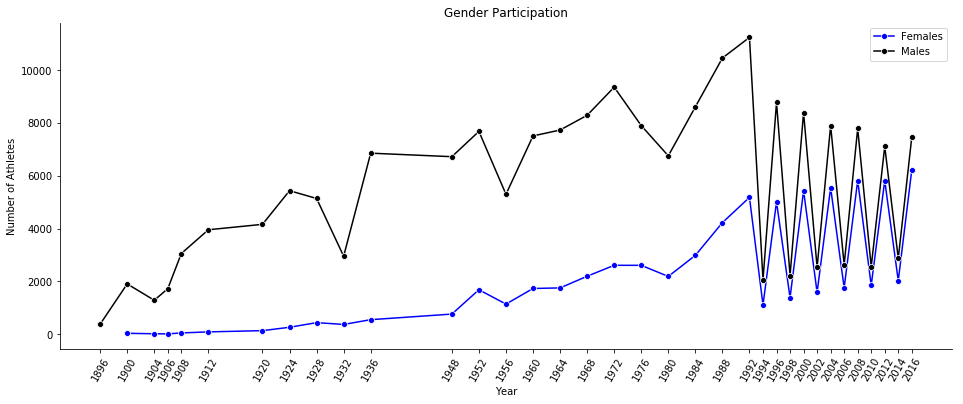

In [29]:
fig = plt.figure(figsize = (16, 6))

sns.lineplot(x = 'Year', y = 'Name', data =year_females, label = 'Females', color = 'blue', marker = 'o')
sns.lineplot(x = 'Year', y = 'Name', data = year_males, label = 'Males', color = 'black', marker = 'o')
plt.xlabel('Year')
plt.xticks(athlete_events['Year'].unique(), rotation = 60)

plt.ylabel('Number of Athletes')
plt.title("Gender Participation",color="black")
plt.grid(True,alpha=.2)

# Clean chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().grid(False)

plt.show()

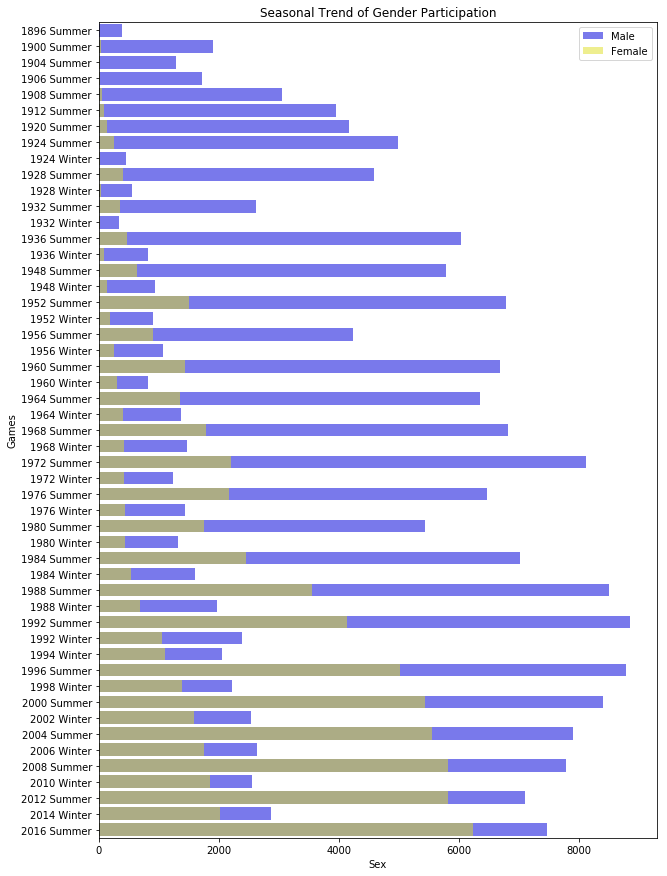

In [30]:
games = list(athlete_events['Games'].unique())
games.sort()
males = []
females = []
for i in games:
    m = athlete_events[athlete_events['Games'] == i]
    male = len(m[m.Sex == 'M'])
    males.append(male)
    female = len(m[m.Sex == 'F'])
    females.append(female)

# Plot

f,ax = plt.subplots(figsize = (10,15))
sns.barplot(x=males,y=games,color='blue',alpha = 0.6,label='Male')
sns.barplot(x=females,y=games,color='yellow',alpha = 0.5,label='Female')
ax.legend(loc='upper right',frameon = True)
ax.set(xlabel='Sex', ylabel='Games',title = "Seasonal Trend of Gender Participation")
plt.show()

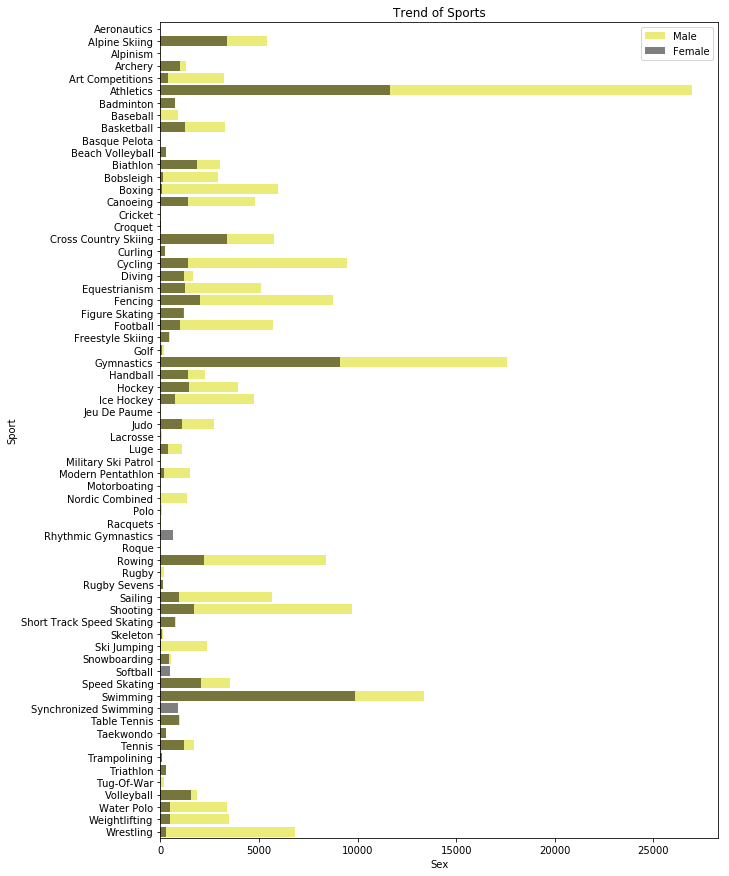

In [31]:
sport = list(athlete_events['Sport'].unique())
sport.sort()
males_ = []
females_ = []
for i in sport:
    s = athlete_events[athlete_events['Sport'] == i]
    male_ = len(s[s.Sex == 'M'])
    males_.append(male_)
    female_ = len(s[s.Sex == 'F'])
    females_.append(female_)

# Plot

f,ax = plt.subplots(figsize = (10,15))
sns.barplot(x=males_,y=sport,color='yellow',alpha = 0.6,label='Male')
sns.barplot(x=females_,y=sport,color='black',alpha = 0.5,label='Female')
ax.legend(loc='upper right',frameon = True)
ax.set(xlabel='Sex', ylabel='Sport',title = "Trend of Sports")
plt.show()

## TOP [20] COUNTRIES WITH MEDALS

In [32]:
_max = 20
top_20 = athlete_events.dropna().Team.value_counts()[:_max]

gold = athlete_events[athlete_events.Medal=='Gold'].Team.value_counts()
gold = gold[top_20.index]
silver = athlete_events[athlete_events.Medal=='Silver'].Team.value_counts()
silver = silver[top_20.index]
bronze = athlete_events[athlete_events.Medal=='Bronze'].Team.value_counts()
bronze = bronze[top_20.index]

_gold = go.Bar(x=gold.index, y=gold, name = 'Gold', marker=dict(color = '#f4cb42'))
_silver = go.Bar(x=silver.index, y=silver, name = 'Silver', marker=dict(color = '#a1a8b5'))
_bronze = go.Bar(x=bronze.index, y=bronze, name = 'Bronze', marker=dict(color = '#cd7f32'))

layout = go.Layout(title='Top 20 Countries With Medals', yaxis = dict(title = 'Medals Won'))

fig4 = go.Figure(data=[_gold, _silver, _bronze], layout=layout)
py.iplot(fig4)

## CORRELATION

In [33]:
olymp = athlete_events.groupby(['Year', 'City'])['Season'].value_counts()
df_ = pd.DataFrame(data={'No. of Athletes': olymp.values}, index=olymp.index).reset_index()

In [34]:
plot = go.Scatter(
    x = df_['Year'],
    y = df_['No. of Athletes'],
    name="Athletes per Olympics game",
    marker=dict(
        color="purple",
    ),
    mode = "markers"
)
data = [plot]
layout = dict(title = 'Athletes per Olympic game',
          xaxis = dict(title = 'Year', showticklabels=True), 
          yaxis = dict(title = 'Number of athletes'),
          hovermode = 'closest'
         )
fig6 = dict(data=data, layout=layout)
iplot(fig6, filename='events-athletes1')